# IS-LM Model

The investment-savings (IS) liquidity preference-money supply (LM) model is a Keynesian macroeconomic model that illustrates how the goods and the money market interact with each other to find the equilibrium between the interest rates and the total economic output in the macroeconomy. This serves as the simple macroeconomic model that allows policymakers to gain insights on how to continue stimulating the economy with changes in the behavior of different agents due to economic phenomena. We formulate the macroeconomic model as follows, starting from the goods market:

From basic economics, recall that the gross domestic product $Y(t)$ at any time $t$ is defined as the sum of household consumption, investment, government spending, and net exports. In this model, we assume a <b>closed economy</b> which implies that there is no trade and the country remains in autarky. 

\begin{align*}
Y(t) = C(t) + I(t) + G(t) \tag{1}                      
\end{align*}

Household consumption $C(t)$ is the sum of autonomous consumption $a$ with the multiplication between the
marginal propensity to consume $b$ and the disposable income $Y_d(t)$.

\begin{align*}
C(t) = a + bY_d(t) \tag{2}                      
\end{align*}

Disposable income of households refer to the difference between GDP (or income) $Y(t)$ and total taxes $T(t)$.

\begin{align*}
Y_d(t) = Y(t) - T(t) \tag{3}
\end{align*}

The level of taxes $T(t)$ is described by the sum of the fixed taxes $T_0$ and the product between the sensitivity of the taxes in relation to output $\lambda$ and GDP $Y(t)$.

\begin{align*}
T(t) = T_o + \lambda Y(t) \tag{4}
\end{align*}

The total amount of investment at any time $t$ refers to the difference between the level of autonomous investments $I_o$ and the product of the sensitivity of the investment in relation to the interest rate $h$ and the real interest rate $r$.

\begin{align*}
I(t) = I_o - h r(t) \tag{5}
\end{align*}

Lastly, we set government expenditure as fixed.

\begin{align*}
G(t) = \bar{G} \tag{6}
\end{align*}


The money market:

The demand for money $M_d(t)$ is defined as is the sum between the autonomous demand for money $M_o$ and the product between the sensitivity of the demand for money in relation to output $k$ and GDP $Y(t)$. The demand for money is reduced by the product between the sensitivity of the demand for money in relation to the interest rate $\mu$ and the interest rate $r$.

\begin{align*}
M_d(t) = M_o + k Y(t) - \mu r(t) \tag{7}
\end{align*}

The money supply in the economy is fixed.

\begin{align*}
M_s(t) = \bar{M} \tag{8}
\end{align*}

Lastly, we have the market clearing condition that the demand for money must equal to the supply for money.

\begin{align*}
M_d(t) = M_s(t) \tag{9}
\end{align*}


We attempt to model the change in output $Y(t)$ with respect to time $t$ by taking the derivative of $Y$ with respect to $t$:

\begin{align*}
\frac{dy}{dt} = \alpha(C(t) + I(t) + G(t) - Y(t)) \tag{10}
\end{align*}

where $\alpha$ refers to the speed of adjustment to equilibrium in the goods market.

We now derive the differential equations that explains the change of output (GDP) over time, following the IS-LM model.

Plugging in $2$ to $6$, we have:

\begin{align*}
\frac{dy}{dt} = \alpha(a + bY_d(t) + I_o - hr(t) + \bar{G} - Y(t)) 
\end{align*}

\begin{align*}
\frac{dy}{dt} = \alpha(a + b(Y(t) - T(t)) + I_o - hr(t) + \bar{G} - Y(t)) 
\end{align*}

\begin{align*}
\frac{dy}{dt} = \alpha(a + b(Y(t) - (T_o + \lambda Y(t))) + I_o - hr(t) + \bar{G} - Y(t)) 
\end{align*}

\begin{align*}
\frac{dy}{dt} = \alpha(a - bT_o + I_o + \bar{G}) - \alpha((1-b)(1-\lambda)Y(t)) - \alpha hr(t) \tag{11}
\end{align*}

We do the same thing to formulate a differential equation that explains the change in real interest rates over time:

\begin{align*}
\frac{dr}{dt} = \beta(M_d(t) - M_s(t)) 
\end{align*}

where $\beta$ refers to the speed of adjustment to equilibrium in the money market.

The IS-LM model assumes that $\beta > \alpha$. That is, the equlibrium interest rates tend to adjust faster relative to the equlibrium output. If this assumption is violated, we would expect oscillating values for GDP and interest rates.  

Plugging in $7$ to $9$, we have:

\begin{align*}
\frac{dr}{dt} = \beta(M_o + k Y(t) - \mu r(t) - \bar{M}) 
\end{align*}

\begin{align*}
\frac{dr}{dt} = \beta(M_o - \bar{M} + k Y(t) - \mu r(t)) \tag{12}
\end{align*}


The system of ordinary differential equations that we would be modelling in this notebook are represented by equations $11$ and $12$, which are noted to be functions of $Y(t)$ and $r(t)$. These two are the endogenous variables in this dynamic model.

On the other hand, $T_o$, $I_o$, $M_o$ are policy variables which are to be defined as exogenous in the IS-LM model. These are variables that can be tweaked or adjusted by policymakers in order to counteract the effects of the different actions of agents in the economy.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Comparing Forward Euler, RK4 and an ODE Solver

We compare the Forward Euler, RungeKutta4 and `scipy`'s ODE solver in terms of the solution that they would be generating for the system of differential equations that we have derived above.

In [2]:
class ODESolver:
    def __init__(self, f): 
        # Wrap user’s f in a new function that always
        # converts list/tuple to array (or let array be array)
        self.f = lambda u, t: np.asarray(f(u, t), float)
        
    def set_initial_condition(self, U0):
        if isinstance(U0, (float,int)):    # scalar ODE
            self.neq = 1                   # no of equations
            self.U0 = float(U0)
        else: # system of ODEs
            U0 = np.asarray(U0)
            self.neq = U0.size # no of equations
            self.U0 = U0
            
    def solve(self, time_points):
        self.t = np.asarray(time_points)
        N = len(self.t)

        if self.neq == 1: # scalar ODEs
            self.u = np.zeros(N)
        
        else: # systems of ODEs
            self.u = np.zeros((N,self.neq))
            
        # Assume that self.t[0] corresponds to self.U0
        self.u[0] = self.U0
        
        # Time loop
        for n in range(N-1):
            self.n = n
            self.u[n+1] = self.advance()
        return self.u, self.t
    
class RungeKutta4(ODESolver):
    def advance(self):
        u, f, n, t = self.u, self.f, self.n, self.t
        dt = t[n+1] - t[n]
        dt2 = dt/2.0
        k1 = f(u[n], t)
        k2 = f(u[n] + dt2*k1, t[n] + dt2)
        k3 = f(u[n] + dt2*k2, t[n] + dt2)
        k4 = f(u[n] + dt*k3, t[n] + dt)
        unew = u[n] + (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)
        return unew
    
class ForwardEuler(ODESolver):
    def advance(self):
        u, f, n, t = self.u, self.f, self.n, self.t
        dt = t[n+1] - t[n]
        unew = u[n] + dt*f(u[n], t[n])
        return unew

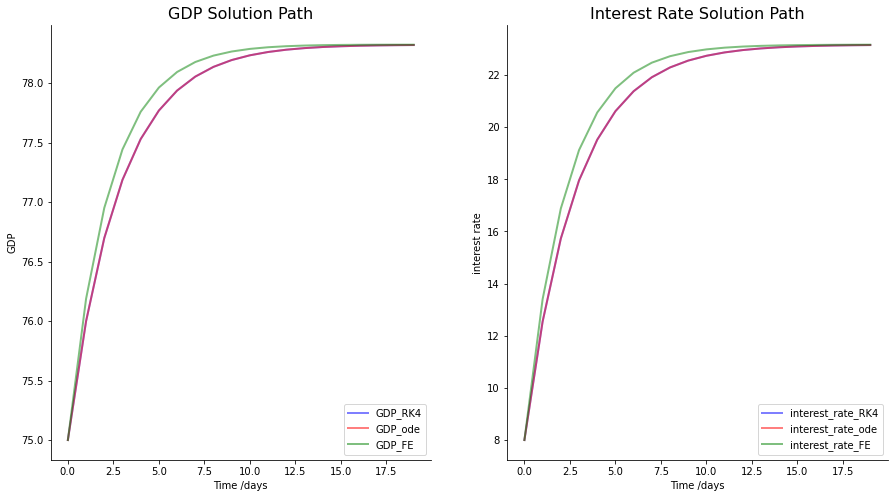

In [3]:
#### list of all parameters in the model

a = 15 # autonomous consumption
I_0 = 10 # autonomous investment
T_0 = 0 # no fixed taxes
M_0 = 0 # no autonomous demand for money
alpha_val = 0.05 # speed of adjustment in goods market
beta_val = 0.8  # speed of adjustment in money market
lambda_val = 0.25 # sensitivity of taxes in relation to GDP
b = 0.75 # marginal propensity to consume 
h = 1.525 # sensitivity of investment in relation to interest rates
k = 0.25 # sensitivity of demand for money in relation to GDP
mu_val = 0.5 # sensitivity of demand for money in relation to interest rates
G = 25 # government spending, exogenous
M = 8 # money supply, exogenous

time_points = np.arange(0, 20)

def IS_LM_model(u, t):    
    GDP, interest_rate = u[0], u[1]
    dYdt = ((alpha_val * (a - b * T_0 + I_0 + G)) - 
            (alpha_val * ((1-b) * (1-lambda_val) * GDP)) - 
            (alpha_val * h * interest_rate)) 
    drdt = beta_val * (M_0 - M + k * GDP - (mu_val * interest_rate))
    return [dYdt, drdt]


# Initial conditions vector
Y_0 = 75
r_0 = 8

# solve using RK4
solver_RK4 = RungeKutta4(IS_LM_model)
solver_RK4.set_initial_condition([Y_0, r_0])
u, t = solver_RK4.solve(time_points)
GDP_RK4 = u[:,0]
interest_rate_RK4 = u[:,1]

# solve using Forward Euler
solver_FE = ForwardEuler(IS_LM_model)
solver_FE.set_initial_condition([Y_0, r_0])
u, t = solver_FE.solve(time_points)
GDP_FE = u[:, 0]
interest_rate_FE = u[:, 1]

# The IS-LM model differential equations
def system(init_values, t, a, I_0, T_0, M_0, G, M, alpha_val, beta_val, 
           lambda_val, b, h, k, mu_val):
    GDP, interest_rate = init_values
    dYdt = ((alpha_val * (a - b * T_0 + I_0 + G)) - 
            (alpha_val * ((1-b) * (1-lambda_val) * GDP)) - 
            (alpha_val * h * interest_rate)) 
    drdt = beta_val * (M_0 - M + k * GDP - (mu_val * interest_rate))
    return dYdt, drdt

init_conds = Y_0, r_0
args_tuple = (a, I_0, T_0, M_0, G, M, alpha_val, beta_val, lambda_val, b, h, k, mu_val)

# Integrate the IS-LM differential equations over the time grid, t.
ret = odeint(system, init_conds, time_points, args=args_tuple)

GDP_odeint, interest_rate_odeint = ret.T

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
ax = ax.flatten()
ax[0].plot(t, GDP_RK4, 'b', alpha=0.5, lw=2, label='GDP_RK4')
ax[0].plot(t, GDP_odeint, 'r', alpha=0.5, lw=2, label='GDP_ode')
ax[0].plot(t, GDP_FE, 'g', alpha=0.5, lw=2, label='GDP_FE')
ax[0].set_xlabel('Time /days')
ax[0].set_ylabel('GDP')
ax[0].set_title('GDP Solution Path', fontsize=16)
ax[0].legend(loc=4)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[1].plot(t, interest_rate_RK4, 'b', alpha=0.5, lw=2, label='interest_rate_RK4')
ax[1].plot(t, interest_rate_odeint, 'r', alpha=0.5, lw=2, label='interest_rate_ode')
ax[1].plot(t, interest_rate_FE, 'g', alpha=0.5, lw=2, label='interest_rate_FE')
ax[1].set_xlabel('Time /days')
ax[1].set_ylabel('interest rate')
ax[1].set_title('Interest Rate Solution Path', fontsize=16)
ax[1].legend(loc=4)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
plt.show()

From the plot, we see that the Forward Euler method tends to have generated higher estimates of GDP values and interest rates the longer we project them into the future. Moreover, it can be seen as well that the solution paths provided by the RungeKutta4 method and scipy's ODE solver are very close to each other. From the paper cited in this work, it is seen that the actual solution is actually the path provided by RK4 and the ODE solver. This shows the simplicity of the Forward Euler method in generating the solution.

In [4]:
def plot_graphs(GDP, interest_rate, t, case):
    """Visualize GDP and interest rate along with their behavior over time."""
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
    plt.suptitle(case, fontsize=20)
    ax = ax.flatten()

    ax[0].plot(GDP, interest_rate, color='purple')
    ax[0].set_title('GDP and Interest Rate', fontsize=16)
    ax[0].set_xlabel('GDP')
    ax[0].set_ylabel('Interest Rate')
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)

    ax[1].plot(t, GDP, color='blue', alpha=0.5, lw=2, label='GDP')
    ax[1].plot(t, interest_rate, color='red', alpha=0.5, lw=2, label='Interest Rate')
    ax[1].set_title('Behavior over Time', fontsize=16)
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('GDP/Interest Rate')
    ax[1].legend()
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    plt.show()
    

def plot_simulations(GDP, interest_rate, t, case):
    """Visualize GDP and interest rate along with their behavior over time."""
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
    plt.suptitle(case, fontsize=20)
    ax = ax.flatten()
    
    ax[0].plot(GDP_odeint, interest_rate_odeint, color='purple', alpha=0.5, linestyle='--', label='Base')
    ax[0].plot(GDP, interest_rate, color='purple', label='Policy')
    ax[0].set_title('GDP and Interest Rate', fontsize=16)
    ax[0].set_xlabel('GDP')
    ax[0].set_ylabel('Interest Rate')
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)

    ax[1].plot(t, GDP, color='blue', lw=2, label='GDP with policy')
    ax[1].plot(t, GDP_odeint, color='blue', alpha=0.5, linestyle='--', label='GDP Base Case')
    ax[1].plot(t, interest_rate, color='red', lw=2, label='Interest Rate with Policy')
    ax[1].plot(t, interest_rate_odeint, color='red', alpha=0.5, linestyle='--', label='Interest Rate Base Case')
    ax[1].set_title('Behavior over Time', fontsize=16)
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('GDP/Interest Rate')
    ax[1].legend()
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    plt.show()

We plot below the behavior over time plot of GDP and interest rates, for the base case. The values plugged in to each parameter are the ones provided by the paper linked in the references.

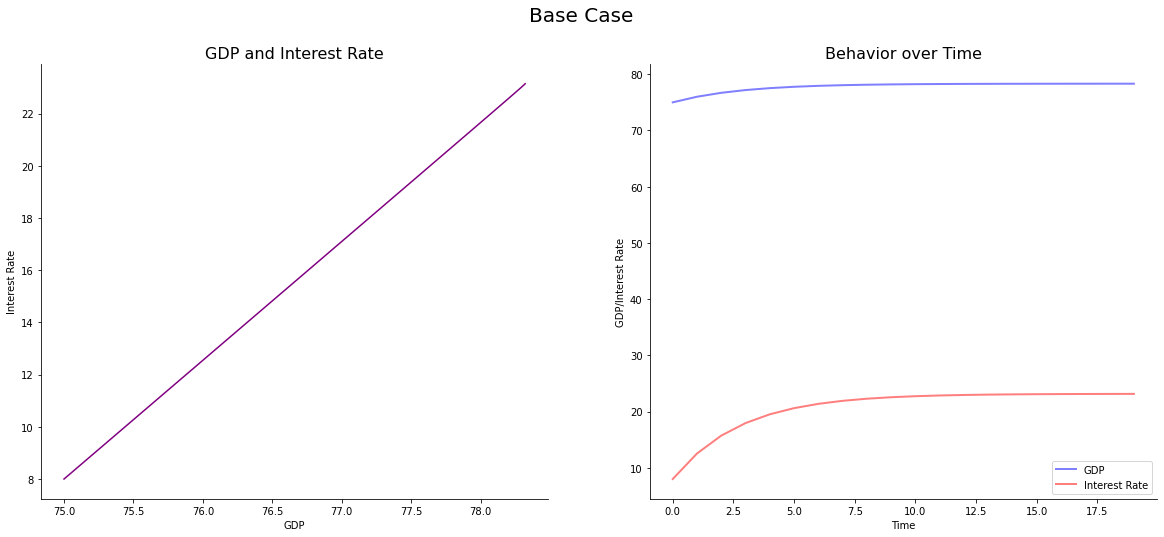

In [5]:
plot_graphs(GDP_odeint, interest_rate_odeint, t, 'Base Case')

## Tweak Parameters for Policy Simulations

### Case 1: Contractionary Monetary Policy 

A contractionary monetary policy is often done by the central bank (BSP in the case of the Philippines) to curtail inflation by reducing the money supply injected into the economy.

For this simulation, let us try reducing $\bar M= 8$ down to $\bar M = 2$. Every other parameter is kept the same.

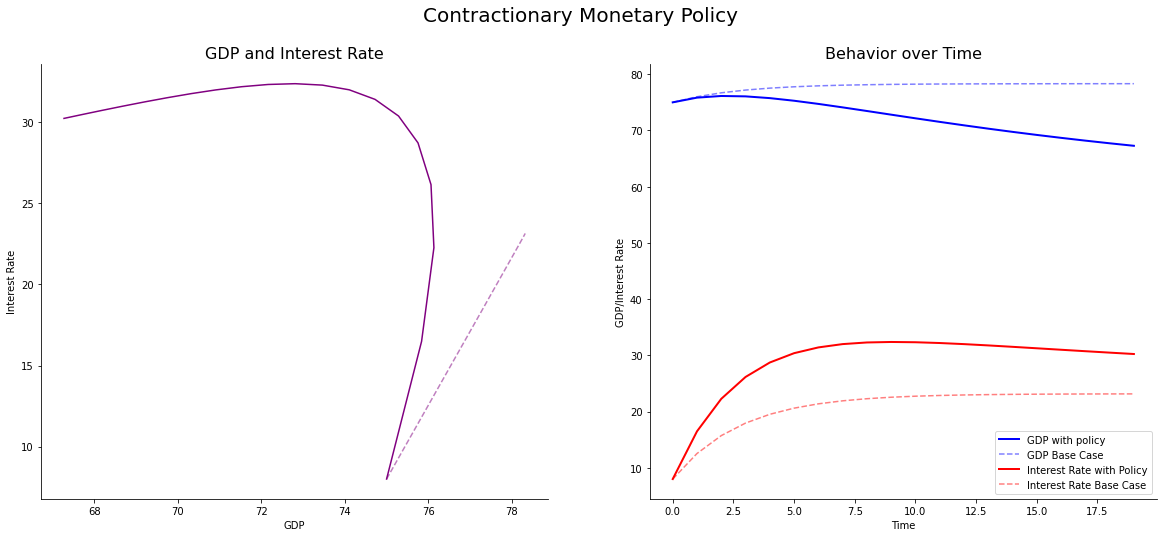

In [6]:
a = 15 
I_0 = 10
T_0 = 0
M_0 = 0
G = 25
M = 2 # tweaked from 8 to 2
alpha_val = 0.05
beta_val = 0.8 
lambda_val = 0.25
b = 0.75
h = 1.525
k = 0.25
mu_val = 0.5
time_points = np.arange(0, 20)

init_conds = Y_0, r_0
args_tuple = (a, I_0, T_0, M_0, G, M, alpha_val, beta_val, lambda_val, b, h, k, mu_val)

# Integrate the IS-LM differential equations over the time grid
ret_contract = odeint(system, init_conds, time_points, args=args_tuple)

GDP_contract, interest_rate_contract = ret_contract.T

plot_simulations(GDP_contract, interest_rate_contract, time_points, 'Contractionary Monetary Policy')

The results of the simulation are consistent with macroeconomic theory. In a contractionary monetary policy, the central bank would be raise interest rates to make lending more expensive. This increase in interest rates would decline the amount of domestic investment that can be accumulated, which leads to the slowing down of the economy that is seen by the reduction in GDP over time. With GDP declining, inflation rates are also controlled. 

### Case 2: Expansionary Fiscal Policy Due to a Reduction in Private Consumption

In this case, let us simulate the effects of the COVID-19 pandemic on our domestic economy. With the pandemic, private households have been reluctant to spend their incomes as they are very uncertain about whether they would still realize the same future streams of income that they are currently earning in the present. Hence, the marginal propensity to consume in $(2)$ which is referred to as by $b$ declines. 

Because of this deficit in private consumption, the government needs to boost aggregate demand in the entire economy by increasing its spending on different infrastructure projects (which is the reason why the Duterte administration still continued with its flagship Build, Build, Build program even with the pandemic). Doing this would avoid a huge drop in the economy's GDP as the decline in consumption is offset by an increase in government spending.

With an expansionary fiscal policy, we increase government spending from $G = 25$ to $G = 75$ -- making it three times as large relative from the base case. We also reduce the marginal propensity to consume $b$ from $b = 0.75$ to $b = 0.25$. Given that the sizes of the policy changes are the same, let us see which among the counteracting effects would dominate.

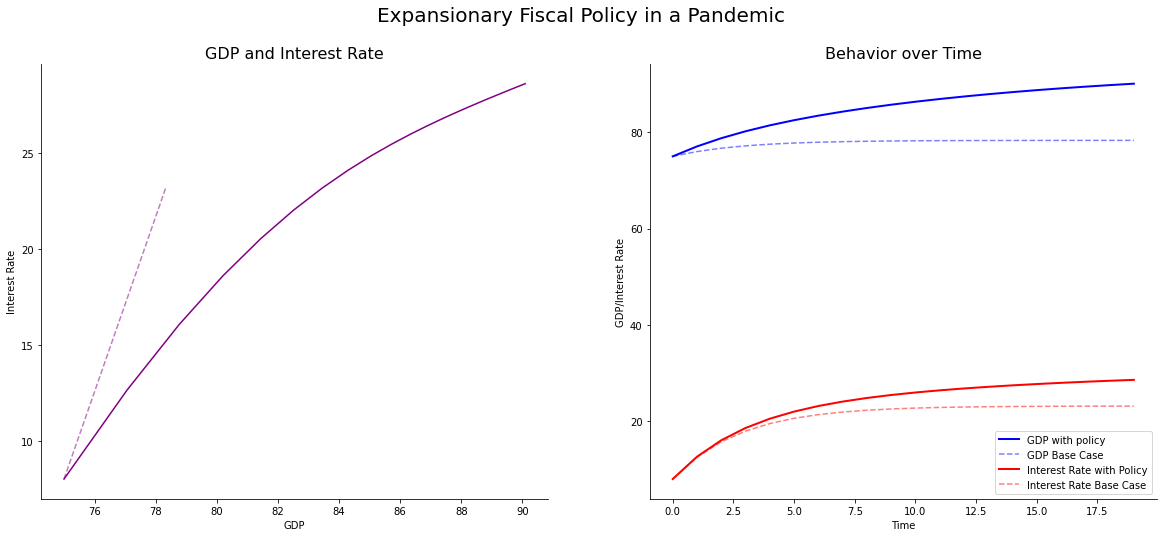

In [7]:
a = 15
I_0 = 10
T_0 = 0
M_0 = 0
G = 75 # tweaked from 25 to 75
M = 8
alpha_val = 0.05
beta_val = 0.8 
lambda_val = 0.25
b = 0.25 # reduced from 0.75 to 0.25
h = 1.525
k = 0.25
mu_val = 0.5

time_points = np.arange(0, 20)

init_conds = Y_0, r_0
args_tuple = (a, I_0, T_0, M_0, G, M, alpha_val, beta_val, lambda_val, b, h, k, mu_val)

# Integrate the IS-LM differential equations over the time grid, t.
ret_expand = odeint(system, init_conds, time_points, args=args_tuple)

GDP_expand, interest_rate_expand = ret_expand.T

plot_simulations(GDP_expand, interest_rate_expand, time_points, 'Expansionary Fiscal Policy in a Pandemic')

From the simulation above, we can see how a expansionary fiscal policy is effective in curtailing the effects of reduced private consumption. Even if the magnitude of increase of the exogenous government spending and the decline in the marginal propensity to consume is the same, we observe from the simulation that the increase in government spending tends to dominate more as this has translated to a higher economic output. Do take note though that an expansionary fiscal policy also leads to an increase in the interest rates. This could lead to inflation accelerating (which has happened during the pandemic) making the prices of goods and services more expensive. Although an expansionary fiscal policy could help continue improving the GDP even in a pandemic, governments must be wary of an increase in the interest rates that go along with it as this can lead to inflationary effects in the future.

## Key Takeaways

In this work, we were able to implement the dynamics of the IS-LM model with the use of numerical methods to solve systems of ordinary differential equations. The IS-LM model presents the interaction between the goods market and the money market, and this model illustrates he effects of each economic agent's actions in the macroeconomy (in particular, to domestic output measured by GDP along with real interest rates). By comparing different numerical methods techniques, we learned that the RungeKutta4 method is a very efficient method in solving systems of ordinary differential equations as it highly overlaps with the solution of the given system. 

From the policy simulations undertaken in the model, we were able to learn that a contractionary monetary policy would lead to a decline in GDP over time. Likewise, we also explored tweaking multiple parameters in one particular scenario by demonstrating that an expansionary fiscal policy could be used in order to stimulate the economy when domestic household consumption falls due to the pandemic. 

We note though that the IS-LM model is just an elementary macroeconomic model that illustrates the effect on domestic output (GDP) and interest rates based on actions performed by agents in the macroeconomy. The model could be further extended by relaxing the assumption of a closed economy. By doing this, we can see how changes in the domestic exchange rate could affect the economy. Moreover, we can also extend the model by adding another differential equation that illustrates the effect of different economic policies to a country's inflation rate.

## References

[1] Nascimento, A. et.al. (2019). Stability Analysis of the Equilibrium Point of the IS-LM Model
for a Closed Economy. Pan-Americal Association of Computational Interdisciplinary Sciences. DOI: doi:10.6062/jcis.2019.10.03.0167

[2] Shone, R. An introduction to economic dynamics, 2001, Cambridge University Press, Cambridge.